In [ ]:
# https://vermontconversationlab.com/uncertainty-corpus/

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# uncertainty corpus

In [8]:
# function to filter for tweets containing requested keywords

def filter(tweet_df,text_col,keyword_lst,question_words):
    """
    input and output: pd dataframe
    text_col: the column name of tweet texts
    """
    tweets = tweet_df[text_col]
    filtered_df = pd.DataFrame()

    # keywords
    for word in keyword_lst:
        tmp = tweet_df[tweets.str.lower().str.contains(word)]
        filtered_df = filtered_df.append(tmp)

    # question mark
    tmp = tweet_df[tweets.str.lower().str.contains('?',regex=False)]
    filtered_df = filtered_df.append(tmp)

    # question words
    for word in question_words:
        tmp = tweet_df[(tweets.str.lower().str.contains(': '+word+' ',regex=True)) |
                       (tweets.str.lower().str.contains('^'+word+' ',regex=True)) |
                       (tweets.str.lower().str.contains('\. '+word+' ',regex=True)) |
                       (tweets.str.lower().str.contains(', '+word+' ',regex=True))]
        filtered_df = filtered_df.append(tmp)

    filtered_df.drop_duplicates()
    return filtered_df


In [9]:
# load keywords
with open('uncertainty_keywords.txt','r') as f:
    uncertainty_keywords = f.read().splitlines()

# add words indicating questions
question_words = ['how','why','what','who','which','whose','where','when','has','have','are','is','do','does','did']


In [10]:
# get all variable names
tweet_colnames = ['tweetid', 'userid', 'screen_name', 'date', 'lang', 'location',
       'place_id', 'place_url', 'place_type', 'place_name', 'place_full_name',
       'place_country_code', 'place_country', 'place_bounding_box', 'text',
       'extended', 'coord', 'reply_userid', 'reply_screen', 'reply_statusid',
       'tweet_type', 'friends_count', 'listed_count', 'followers_count',
       'favourites_count', 'statuses_count', 'verified', 'hashtag',
       'urls_list', 'profile_pic_url', 'profile_banner_url', 'display_name',
       'date_first_tweet', 'account_creation_date', 'rt_urls_list',
       'mentionid', 'mentionsn', 'rt_screen', 'rt_userid', 'rt_text',
       'rt_hashtag', 'rt_qtd_count', 'rt_rt_count', 'rt_reply_count',
       'rt_fav_count', 'rt_tweetid', 'rt_location', 'qtd_screen', 'qtd_userid',
       'qtd_text', 'qtd_hashtag', 'qtd_qtd_count', 'qtd_rt_count',
       'qtd_reply_count', 'qtd_fav_count', 'qtd_tweetid', 'qtd_urls_list',
       'qtd_location', 'sent_vader', 'token', 'media_urls', 'rt_media_urls',
       'q_media_urls\r','unknown']
MF_colnames = ['bias_sanctity', 'bias_fairness', 'bias_authority','bias_loyalty', 'bias_care',
       'intensity_sanctity', 'intensity_fairness','intensity_authority', 'intensity_loyalty', 'intensity_care',
       'vice_sanctity', 'virtue_sanctity', 'vice_fairness', 'virtue_fairness',
       'vice_authority', 'virtue_authority', 'vice_loyalty', 'virtue_loyalty','vice_care', 'virtue_care']
emot_colnames = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']

# Tweet data

In [ ]:
# load tweet data, filter for uncertainty
df_ = pd.read_csv('covid_tweets_random_sampled_5perc.csv',lineterminator='\n',index_col=False,names=tweet_colnames+MF_colnames+emot_colnames)
df = filter(df_,'text',uncertainty_keywords,question_words)
df = df.drop_duplicates(subset=['tweetid'])
df

In [13]:
# save / load

# df.to_csv('uncertain_tweets.csv',index=False)
# df.to_csv('uncertain_tweets_expanded.csv',index=False)
df = pd.read_csv('uncertain_tweets_expanded.csv',lineterminator='\n')

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# number of fear
len(df[df.fear==1])/len(df)

0.10317398377888373

In [14]:
# time series
df.date = pd.to_datetime(df.date)
df.time = df.date
df.date = df.time.dt.date


/var/folders/gn/1599mksx4wjcpgm_jjp35nxh0000gn/T/ipykernel_10492/2007784685.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.time = df.date


<AxesSubplot:xlabel='date'>

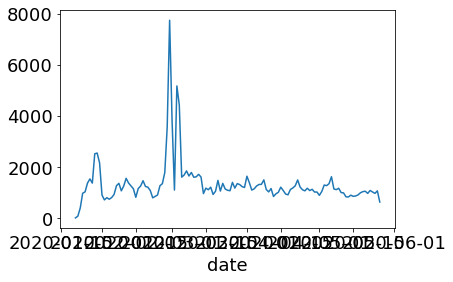

In [15]:
# number of uncertainty tweets per day
n_uncertain_tweets = df.groupby('date')['tweetid'].count()
n_uncertain_tweets.plot()

In [ ]:
# read and clean up tweet data
# df_all = pd.read_csv('covid_tweets_random_sampled_5perc.csv',lineterminator='\n',index_col=False,names=tweet_colnames+MF_colnames+emot_colnames)
# df_all.date = pd.to_datetime(df_all.date)

# df_all = df_all.sort_values('date').loc[:721081]



In [ ]:
# df_all = df_all[~df_all.optimism.isnull()]
# tmp = df_all[df_all.trust.isnull()]
# tmp.drop('trust',axis=1,inplace=True)
# df_all = df_all[~df_all.trust.isnull()]
# df_all.drop('tid',axis=1,inplace=True)
# tmp.columns = tweet_colnames+MF_colnames+['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
# df_all = pd.concat([df_all,tmp],axis=0)

In [ ]:
# df_all.to_csv('covid_tweets_random_sampled_5perc.csv',index=False)

# Uncertainty and fear

In [17]:
# read original tweets and get num_tweets per day
df_all = pd.read_csv('covid_tweets_random_sampled_5perc.csv',lineterminator='\n')
df_all.date = pd.to_datetime(df_all.date)
df_all.time = df_all.date
df_all.date = df_all.time.dt.date
df_all = df_all[df_all.date > pd.Timestamp('2020-01-21')]
n_tweets = df_all.groupby('date')['tweetid'].count()

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/gn/1599mksx4wjcpgm_jjp35nxh0000gn/T/ipykernel_10492/984779032.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_all.time = df_all.date
/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [ ]:
# compute time series as daily average for fear and uncertainty
uncertainty = (n_uncertain_tweets/n_tweets)
uncertainty = uncertainty[1:]

fear = df_all.groupby('date')['fear'].mean()

fear_tweets = set(df_all.loc[df_all.fear==1,'tweetid'].values)
uncertain_tweets = set(df.tweetid.values)
print("number of fear tweets=",len(fear_tweets))
print('number of uncertain tweets=',len(uncertain_tweets))
print('number of fear and uncertain tweets=',len(fear_tweets.intersection(uncertain_tweets)))
print('number of total tweets=',len(df_all))

In [19]:
# z-score
from scipy.stats import zscore
uncertainty_z = (uncertainty-uncertainty.mean())/uncertainty.std()
fear_z = (fear-fear.mean())/fear.std()

/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/Users/fionaguo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


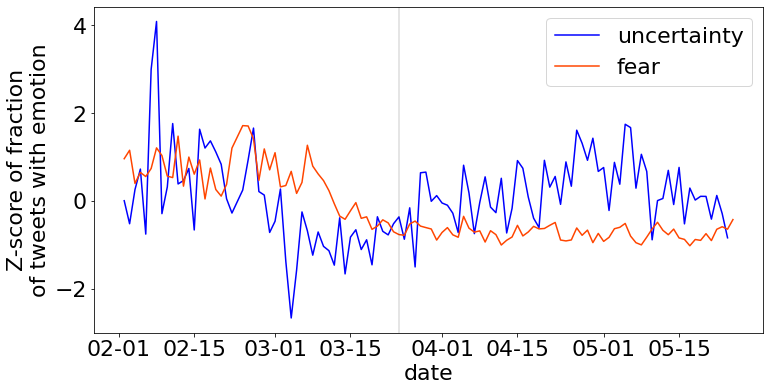

In [21]:
# plot
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12, 6))
uncertainty_z[(uncertainty_z.index>pd.Timestamp('2020-02-01')) & (uncertainty_z.index<pd.Timestamp('2020-05-25'))].plot(label='uncertainty',color='blue')
fear_z[(fear_z.index>pd.Timestamp('2020-02-01')) & (fear_z.index<=pd.Timestamp('2020-05-25'))].plot(label='fear',color='orangered')
#plt.xlim((pd.Timestamp('2020-01-24'),pd.Timestamp('2020-03-24')))
plt.legend()
plt.ylabel('Z-score of fraction\nof tweets with emotion')
# plt.xlabel('Time')
plt.xticks(rotation=0)
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.axvline(pd.Timestamp('2020-03-24'), color='black', lw=2, alpha=0.1)

In [37]:
# correlation
from scipy import stats
print(stats.spearmanr(uncertainty_z[pd.Timestamp('2020-02-01'):pd.Timestamp('2020-03-24')],fear_z[pd.Timestamp('2020-02-01'):pd.Timestamp('2020-03-24')]))

SpearmanrResult(correlation=0.41688721932895073, pvalue=0.0021090079311773227)


In [ ]:
# manually read and validate
for r,row in df.iterrows():
    print(row['text'])
    print()

In [24]:
# emolex emotions vs uncertainty
df_emolex = pd.read_csv('covid_tweets_random_sampled_5perc_emolex_numerical_score.csv')
df_emolex['date'] = pd.to_datetime(df_emolex['date'])
df_emolex = df_emolex.set_index('date')

In [27]:
fear_emolex = df_emolex['fear_emolex']
fear_emolex_z = (df_emolex['fear_emolex'] - df_emolex['fear_emolex'].mean())/df_emolex['fear_emolex'].std()

In [38]:
print(stats.spearmanr(uncertainty_z[pd.Timestamp('2020-02-01'):pd.Timestamp('2020-03-24')],fear_emolex_z[pd.Timestamp('2020-02-01'):pd.Timestamp('2020-03-24')]))

SpearmanrResult(correlation=0.5739776316912831, pvalue=8.640220168841963e-06)
